In [1]:
!pip install sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pickle


with open('/content/drive/MyDrive/MAJOR/reference1_data.pkl', 'rb') as f:
    df = pickle.load(f)

print("Data loaded using Pickle.")


Data loaded using Pickle.


In [8]:
!pip install pymupdf

In [10]:
!pip install python-docx

In [11]:
import docx

In [12]:
import os

def extract_text(file_path):
    """Extracts text from DOCX or PDF files based on file type."""
    ext = os.path.splitext(file_path)[-1].lower()

    if ext == ".docx":
        return extract_text_from_docx(file_path)
    elif ext == ".pdf":
        return extract_text_from_pdf(file_path)
    else:
        raise ValueError("Unsupported file format. Please upload a DOCX or PDF file.")

In [14]:
!pip install PyPDF2

In [15]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 969.6/969.6 kB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.9/292.9 kB 28.1 MB/s eta 0:00:00


In [16]:
import re
import docx
import fitz
from PIL import Image
import easyocr
from google.colab import files

reader = easyocr.Reader(['en'])

def extract_text(file_name):

    try:
        if file_name.endswith(".docx"):
            doc = docx.Document(file_name)
            text = [para.text.strip() for para in doc.paragraphs if para.text.strip()]
            return "\n".join(text) if text else "No text found in the Word document."

        elif file_name.endswith(".pdf"):
            text = ""
            with fitz.open(file_name) as pdf:
                for page in pdf:
                    page_text = page.get_text("text")
                    if page_text:
                        text += page_text + "\n"
            return text.strip() if text else "No text found in the PDF."

        elif file_name.lower().endswith((".png", ".jpg", ".jpeg")):
            result = reader.readtext(file_name, detail=0)
            return "\n".join(result) if result else "No text found in the image."

        else:
            raise ValueError("Unsupported file format! Upload .docx, .pdf, .jpg, .png only.")

    except Exception as e:
        print(f" Error during text extraction: {e}")
        return ""

def split_answers(text):

    pattern = r"(?:Q\d+[:.\)]|Question\s*\d+[:.\)]?)"
    parts = re.split(pattern, text, flags=re.IGNORECASE)

    if len(parts) == 1:
        return {"Answer 1": text.strip()}

    answers = {}
    for i in range(1, len(parts)):
        question_num = f"Answer {i}"
        answer_text = parts[i].strip()
        if answer_text:
            answers[question_num] = answer_text

    return answers


uploaded = files.upload()
file_name = list(uploaded.keys())[0]


text = extract_text(file_name)

if text:
    print("Extracted Text:\n", text[:1000])
    answers = split_answers(text)
    if answers:
        print("\n Extracted Answers:")
        for q_num, ans in answers.items():
            print(f"\n{q_num}")
            print(ans[:500])
    else:
        print("No questions and answers detected.")
else:
    print(" No text extracted.")


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Saving same_dataset_A.docx to same_dataset_A.docx
Extracted Text:
 Q1. Supervised learning uses labeled datasets, where each input is paired with the correct output and unsupervised learning uses unlabeled data but Supervised learning is used for classification and regression and unsupervised for clustering and association but Supervised learning requires human intervention for labeling and unsupervised finds patterns autonomously but Supervised learning is more accurate with large labeled datasets and unsupervised handles unknown data distributions but Examples: Supervised  Linear Regression and Unsupervised  K-Means Clustering. In other words, this concept is essential for understanding the underlying mechanisms and achieving better outcomes in real-world applications. By considering practical examples, the distinctions become even clearer, and it becomes easier to apply the concept in diverse scenarios. Furthermore, understanding this deeply can help in optimizing models and improvi

In [17]:
import re
import torch
import fitz
import docx
import os
import pandas as pd
import easyocr
from PIL import Image
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Load the pre-trained sentence transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Initialize EasyOCR Reader (English)
ocr_reader = easyocr.Reader(['en'], gpu=False)

def get_latest_uploaded_file(upload_dir="/content"):
    """Automatically gets the latest uploaded file (PDF, Word, or Image)."""
    supported_ext = ('.pdf', '.docx', '.jpg', '.jpeg', '.png')
    files = [f for f in os.listdir(upload_dir) if f.endswith(supported_ext)]
    if not files:
        raise FileNotFoundError("No supported file found in the upload directory.")
    return max([os.path.join(upload_dir, f) for f in files], key=os.path.getctime)

def extract_text(file_path):
    """Extracts text from Word, PDF, or Image files."""
    if file_path.endswith(".docx"):
        doc = docx.Document(file_path)
        return "\n".join([para.text for para in doc.paragraphs])
    elif file_path.endswith(".pdf"):
        text = ""
        with fitz.open(file_path) as pdf:
            for page in pdf:
                text += page.get_text("text") + "\n"
        return text.strip()
    elif file_path.lower().endswith(('.jpg', '.jpeg', '.png')):
        print("Performing OCR on image...")
        result = ocr_reader.readtext(file_path, detail=0)
        return "\n".join(result).strip()
    else:
        raise ValueError("Unsupported file format. Upload .pdf, .docx, or image.")

def split_answers(text):
    """Splits text into individual answers based on patterns like Q1, Q2, etc."""
    pattern = r"(Q\d+[:.\)]?)"
    parts = re.split(pattern, text)
    answers = {}
    if len(parts) < 3:
        return {"SingleAnswer": text.strip()}
    for i in range(1, len(parts), 2):
        question_num = parts[i].strip()
        answer_text = parts[i + 1].strip() if i + 1 < len(parts) else ""
        answers[question_num] = answer_text
    return answers

def grade_answer(student_answer, df):
    """Grade a single answer using similarity score."""
    if not student_answer.strip():
        return {"Similarity Score": 0.0, "Best Match": "No answer provided"}
    student_embedding = model.encode([student_answer], convert_to_tensor=True)[0]
    df['similarity'] = df['embeddings'].apply(
        lambda x: cosine_similarity([x.cpu().numpy()], [student_embedding.cpu().numpy()])[0][0]
    )
    best_match = df.loc[df['similarity'].idxmax()]
    best_score = best_match['similarity']
    return {
        "Best Match": best_match['Answer'],
        "Similarity Score": round(best_score, 2)
    }

def grade_answers(df, model):
    """Grade one or multiple answers from uploaded file."""
    file_path = get_latest_uploaded_file()
    print(f"Using Uploaded File: {file_path}")
    student_text = extract_text(file_path)
    if not student_text.strip():
        print("No valid text extracted.")
        return {}
    answers = split_answers(student_text)
    results = {}
    for q_num, student_answer in answers.items():
        results[q_num] = grade_answer(student_answer, df)
    return results



# Ensure embeddings exist
if 'embeddings' not in df.columns:
    df['embeddings'] = df['Answer'].apply(lambda x: model.encode([str(x)], convert_to_tensor=True)[0])

# Grade and show results
results = grade_answers(df, model)

print("\n Grading Results:")
for q_num, result in results.items():
    print(f"\n{q_num}:")
    print(f"Best Match: {result['Best Match'][:500]}")
    print(f"Similarity Score: {result['Similarity Score']}")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Using Uploaded File: /content/same_dataset_A.docx

 Grading Results:

Q1.:
Best Match: To understand clustering, we need to have a basic knowledge of Machine Learning. Machine learning is a subset of Artificial Intelligence that allows a machine to automatically learn from past data without programming explicitly. Classical machine learning is often categorized by how an algorithm learns to become more accurate in its predictions. There are four basic approaches: supervised learning, unsupervised learning, semi-supervised learning, and reinforcement learning. The type of algorithm
Similarity Score: 0.8199999928474426

Q15.:
Best Match: In machine learning, overfitting occurs when an algorithm fits too closely or even exactly to its training data, resulting in a model that canÃ¢ÂÂt make accurate predictions or conclusions from any data other than the training data. Overfitting defeats purpose of the machine learning model. Generalization of a model to new data is ultimately what allow

In [19]:
import re
import torch
import docx
import os
import fitz  # PyMuPDF
import easyocr
import pandas as pd
from PIL import Image
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Load SentenceTransformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Initialize EasyOCR reader
ocr_reader = easyocr.Reader(['en'], gpu=False)

def get_latest_uploaded_file(upload_dir="/content"):
    """Automatically get the latest uploaded Word, PDF, or Image file."""
    files = [f for f in os.listdir(upload_dir) if f.endswith(('.pdf', '.docx', '.jpg', '.jpeg', '.png'))]
    if not files:
        raise FileNotFoundError("No supported file found in the upload directory.")
    return max([os.path.join(upload_dir, f) for f in files], key=os.path.getctime)

def extract_text(file_path):
    """Extracts text from .docx, .pdf, or image files."""
    if file_path.endswith(".docx"):
        doc = docx.Document(file_path)
        return "\n".join([para.text for para in doc.paragraphs])
    elif file_path.endswith(".pdf"):
        text = ""
        with fitz.open(file_path) as pdf:
            for page in pdf:
                text += page.get_text("text") + "\n"
        return text.strip()
    elif file_path.lower().endswith(('.jpg', '.jpeg', '.png')):
        print(" Performing OCR on image...")
        result = ocr_reader.readtext(file_path, detail=0)
        return "\n".join(result).strip()
    else:
        raise ValueError("Unsupported file format.")

def split_answers(text):
    """Splits the text into answers based on Q1/Q2/etc. patterns."""
    pattern = r"(Q\d+[:.\)]?)"
    parts = re.split(pattern, text)
    answers = {}
    if len(parts) == 1:
        answers['Q1'] = text.strip()
    else:
        for i in range(1, len(parts), 2):
            question_num = parts[i].strip()
            answer_text = parts[i + 1].strip() if i + 1 < len(parts) else ""
            answers[question_num] = answer_text
    return answers

def grade_answers(df, model):
    """Grades student answers using similarity comparison."""
    file_path = get_latest_uploaded_file()
    print(f"Using Uploaded File: {file_path}")

    student_text = extract_text(file_path)
    answers = split_answers(student_text)

    if 'Assigned Marks' not in df.columns:
        df['Assigned Marks'] = 0.0

    total_marks = 0
    results = {}

    for q_num, student_answer in answers.items():
        if not student_answer.strip():
            results[q_num] = {"Similarity Score": 0.0, "Assigned Marks": 0.0, "Best Match": "No answer provided"}
            continue


        student_embedding = model.encode([student_answer], convert_to_tensor=True)[0]

        df['similarity'] = df['embeddings'].apply(
            lambda x: cosine_similarity([x.cpu().numpy()], [student_embedding.cpu().numpy()])[0][0])

        best_match = df.loc[df['similarity'].idxmax()]
        best_score = best_match['similarity']

        assigned_marks = round(float(best_match['Marks']) * best_score, 2)
        total_marks += assigned_marks
        df.at[best_match.name, 'Assigned Marks'] = assigned_marks

        results[q_num] = {
            "Best Match": best_match['Answer'],
            "Similarity Score": round(best_score, 2),
            "Assigned Marks": assigned_marks,
            "Reference Marks": float(best_match['Marks'])
        }

    results["Grand Total"] = total_marks
    return results



# Ensure embeddings are available
if 'embeddings' not in df.columns:
    df['embeddings'] = df['Answer'].apply(lambda x: model.encode([str(x)], convert_to_tensor=True)[0])

# Grade answers
results = grade_answers(df, model)

# Display results
print("\n Grading Results:")
for q_num, result in results.items():
    if q_num == "Grand Total":
        print(f"\n{q_num}: {result}")
    else:
        print(f"\n{q_num}:")
        print(f"Best Match (First 500 chars): {result['Best Match'][:500]}")
        print(f"Reference Answer Marks: {result['Reference Marks']}")
        print(f"Similarity Score: {result['Similarity Score']}")
        print(f"Assigned Marks: {result['Assigned Marks']}")


print("\n DataFrame with Assigned Marks:")
print(df[['Answer', 'Marks', 'Assigned Marks']].head())


Using Uploaded File: /content/same_dataset_A.docx

 Grading Results:

Q1.:
Best Match (First 500 chars): To understand clustering, we need to have a basic knowledge of Machine Learning. Machine learning is a subset of Artificial Intelligence that allows a machine to automatically learn from past data without programming explicitly. Classical machine learning is often categorized by how an algorithm learns to become more accurate in its predictions. There are four basic approaches: supervised learning, unsupervised learning, semi-supervised learning, and reinforcement learning. The type of algorithm
Reference Answer Marks: 3.0
Similarity Score: 0.8199999928474426
Assigned Marks: 2.450000047683716

Q15.:
Best Match (First 500 chars): In machine learning, overfitting occurs when an algorithm fits too closely or even exactly to its training data, resulting in a model that canÃ¢ÂÂt make accurate predictions or conclusions from any data other than the training data. Overfitting defeats pur

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Actual and predicted scores
actual_scores = [5,5,5,5,5,5,2,10,10,10,5,4,4,5]
predicted_scores = [4.6,4.6,4.7,4.8,4.6,4.2,1.8,8.6,9.0,9.3,4.5,3.8,3.6,4.6]

mae = mean_absolute_error(actual_scores, predicted_scores)
mse = mean_squared_error(actual_scores, predicted_scores)
rmse = np.sqrt(mse)
r2 = r2_score(actual_scores, predicted_scores)

print("MAE:", mae)
print("MSE:",mse)
print("RMSE:", rmse)
print("R² Score:", r2)



MAE: 0.5214285714285715
MSE: 0.38214285714285723
RMSE: 0.6181770435262517
R² Score: 0.9321557971014492


MAE: 0.5214285714285715
MSE: 0.38214285714285723
RMSE: 0.6181770435262517
R² Score: 0.9321557971014492


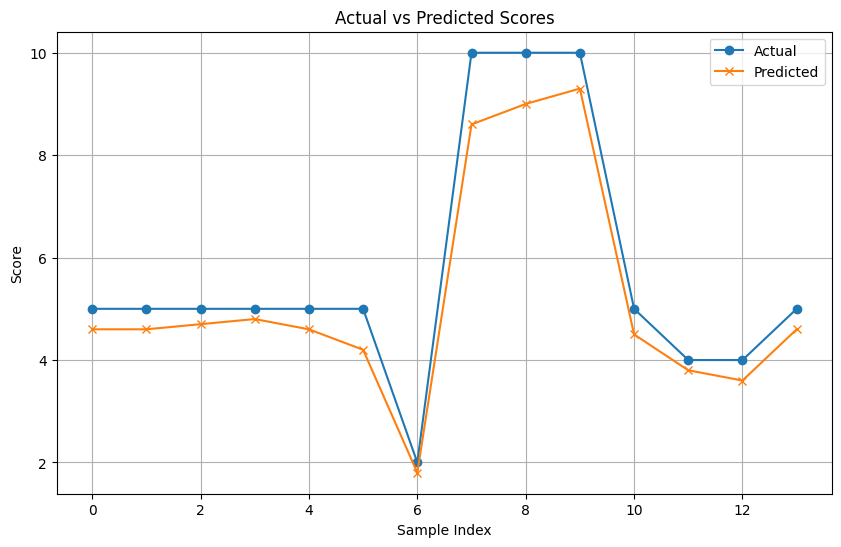

/tmp/ipython-input-21-3284901968.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(range(len(residuals))), y=residuals, palette='coolwarm')


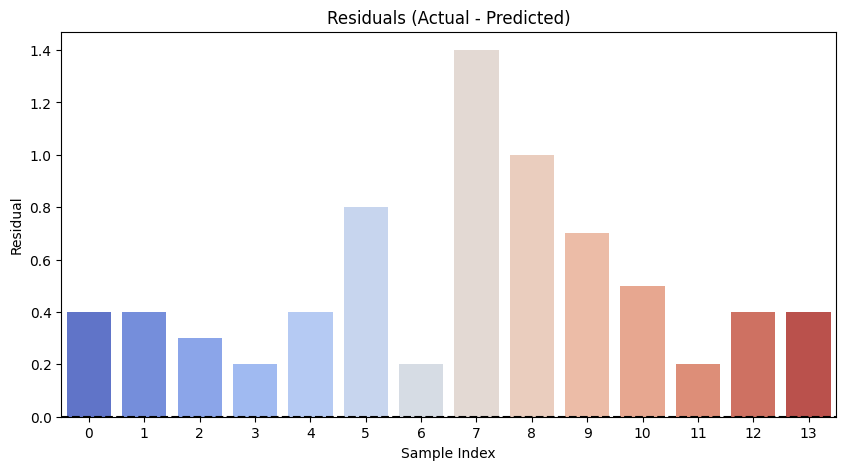

/tmp/ipython-input-21-3284901968.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='viridis')


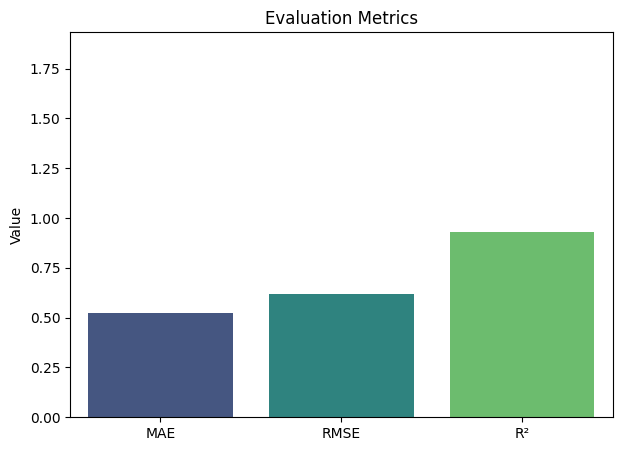

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Actual and predicted scores
actual_scores = [5,5,5,5,5,5,2,10,10,10,5,4,4,5]
predicted_scores = [4.6,4.6,4.7,4.8,4.6,4.2,1.8,8.6,9.0,9.3,4.5,3.8,3.6,4.6]

# Error metrics
mae = mean_absolute_error(actual_scores, predicted_scores)
mse = mean_squared_error(actual_scores, predicted_scores)
rmse = np.sqrt(mse)
r2 = r2_score(actual_scores, predicted_scores)

# Print values
print("MAE:", mae)
print("MSE:",mse)
print("RMSE:", rmse)
print("R² Score:", r2)

# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(actual_scores, label='Actual', marker='o')
plt.plot(predicted_scores, label='Predicted', marker='x')
plt.title('Actual vs Predicted Scores')
plt.xlabel('Sample Index')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

# Residual Plot
residuals = np.array(actual_scores) - np.array(predicted_scores)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(range(len(residuals))), y=residuals, palette='coolwarm')
plt.axhline(0, color='black', linestyle='--')
plt.title('Residuals (Actual - Predicted)')
plt.xlabel('Sample Index')
plt.ylabel('Residual')
plt.show()

# Bar chart of error metrics
plt.figure(figsize=(7, 5))
metrics = ['MAE', 'RMSE', 'R²']
values = [mae, rmse, r2]
sns.barplot(x=metrics, y=values, palette='viridis')
plt.title('Evaluation Metrics')
plt.ylabel('Value')
plt.ylim(0, max(values) + 1)
plt.show()


In [22]:
!pip install gradio

In [23]:
!pip install pyngrok

In [24]:
!pip install flask-cors

In [25]:
import gradio as gr
import os
import torch
import fitz
import docx
import easyocr
import numpy as np
import pandas as pd
from PIL import Image
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import re

# Load pretrained model and OCR
model = SentenceTransformer("all-MiniLM-L6-v2")
ocr_reader = easyocr.Reader(['en'], gpu=False)

# Load reference dataset
df = pd.read_csv("/content/drive/MyDrive/MAJOR/Expanded_Answers_Dataset.csv" ,encoding='ISO-8859-1')  # Update with your dataset path
if 'embeddings' not in df.columns:
    df['embeddings'] = df['Answer'].apply(lambda x: model.encode([str(x)], convert_to_tensor=True)[0])

# ---- Helper Functions ----

def extract_text_from_file(file_path):
    ext = os.path.splitext(file_path)[1].lower()
    if ext == ".docx":
        doc = docx.Document(file_path)
        return "\n".join([para.text for para in doc.paragraphs])
    elif ext == ".pdf":
        text = ""
        with fitz.open(file_path) as pdf:
            for page in pdf:
                text += page.get_text("text") + "\n"
        return text.strip()
    elif ext in [".jpg", ".jpeg", ".png"]:
        ocr_result = ocr_reader.readtext(file_path, detail=0)
        return "\n".join(ocr_result).strip()
    else:
        return ""

def split_answers(text):
    pattern = r"(Q\d+[:.\)]?)"
    parts = re.split(pattern, text)
    if len(parts) == 1:
        return {"Q1": text.strip()}
    answers = {}
    for i in range(1, len(parts), 2):
        question_num = parts[i].strip()
        answer_text = parts[i + 1].strip() if i + 1 < len(parts) else ""
        answers[question_num] = answer_text
    return answers

def grade_answer(text):
    if not text.strip():
        return "No valid text extracted.", ""

    answers = split_answers(text)
    results = ""
    total = 0

    for q_num, answer in answers.items():
        if not answer.strip():
            continue
        student_embedding = model.encode([answer], convert_to_tensor=True)[0]
        df['similarity'] = df['embeddings'].apply(
            lambda x: cosine_similarity([x.cpu().numpy()], [student_embedding.cpu().numpy()])[0][0])
        best_match = df.loc[df['similarity'].idxmax()]
        score = best_match['similarity']
        assigned_marks = round(float(best_match['Marks']) * score, 2)
        total += assigned_marks

        results += f"\n\n{q_num}:\nSimilarity Score: {round(score,2)}\nAssigned Marks: {assigned_marks}"

    results += f"\n\n Grand Total Marks: {round(total, 2)}"
    return text[:1000], results


In [26]:
def handle_file_upload(file):
    if file is None:
        return "No file uploaded", ""

    text = extract_text_from_file(file.name)
    extracted, grading = grade_answer(text)
    return extracted, grading

gr.Interface(
    fn=handle_file_upload,
    inputs=gr.File(label=" Upload Assignment", type="filepath"),
    outputs=[
        gr.Textbox(label=" Extracted Text (Preview)", lines=10),
        gr.Textbox(label=" Grading Result", lines=10)
    ],
    title="Subjective Answer Evaluation using AI",
    description="Upload PDF, Word, or Image files to automatically evaluate answers.",
    theme="default"
).launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://86e9176e5be9a53011.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
